In [2]:
import os
train_happy=os.path.join('Day4/happy-or-sad/happy')
train_sad=os.path.join('Day4/happy-or-sad/sad')
print('Total training happy images',len(os.listdir(train_happy)))
print('Total training sad images',len(os.listdir(train_sad)))

Total training happy images 40
Total training sad images 40


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
rows=4
cols=4
pic_index=0
happy_name=os.listdir(train_happy)
sad_name=os.listdir(train_sad)

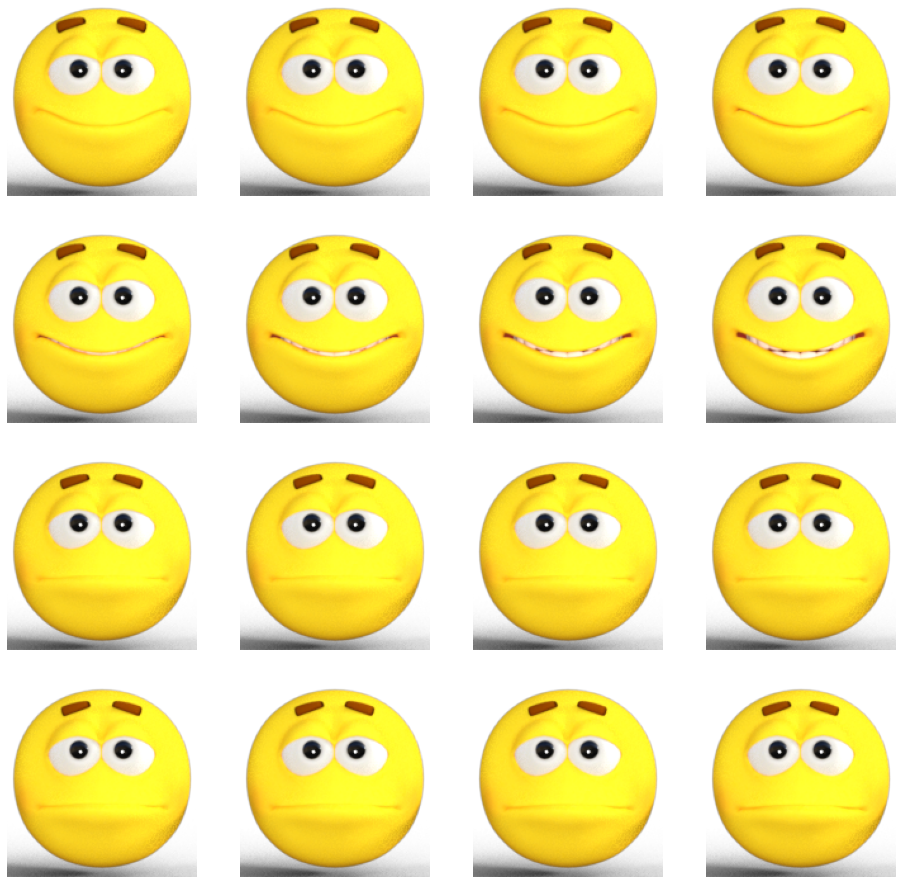

In [4]:
fig=plt.gcf()
fig.set_size_inches(cols*4,rows*4)
pic_index+=8
next_happy=[os.path.join(train_happy,fname)
           for fname in happy_name[pic_index-8:pic_index]]
next_sad=[os.path.join(train_sad,fname)
         for fname in sad_name[pic_index-8:pic_index]]
for i,img_path in enumerate(next_happy+next_sad):
    sp=plt.subplot(rows,cols,i+1)
    sp.axis('off')
    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [5]:
import tensorflow as tf

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>0.95):
            print("95% accuracy achieved")
            self.model.stop_training=True

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    "Day4/happy-or-sad",
    target_size=(150,150),
    batch_size=16,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [10]:
callbacks=myCallback()
model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/15
2/2 [==============================] - 2s 219ms/step - loss: 8.6348 - acc: 0.5000
Epoch 2/15
2/2 [==============================] - 1s 219ms/step - loss: 1.3971 - acc: 0.5625
Epoch 3/15
2/2 [==============================] - 1s 212ms/step - loss: 0.7168 - acc: 0.5417
Epoch 4/15
2/2 [==============================] - 1s 216ms/step - loss: 0.9660 - acc: 0.4792
Epoch 5/15
2/2 [==============================] - 0s 191ms/step - loss: 0.6036 - acc: 0.6667
Epoch 6/15
2/2 [==============================] - 0s 223ms/step - loss: 0.5866 - acc: 0.7083
Epoch 7/15
2/2 [==============================] - 0s 206ms/step - loss: 0.5252 - acc: 0.6667
Epoch 8/15
2/2 [==============================] - 0s 194ms/step - loss: 0.3623 - acc: 0.8125
Epoch 9/15
2/2 [==============================] - 0s 213ms/step - loss: 0.3049 - acc: 1.0000
95% accuracy achieved


Happy


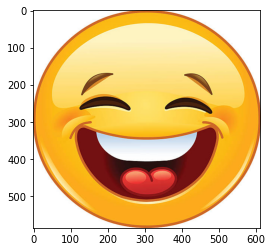

In [13]:
import numpy as np
from keras.preprocessing import image
imagename='Day4/happy1.jpg'
img=image.load_img(imagename,target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
plt.imshow(mpimg.imread(imagename))
if classes[0]>0.5:
    print("Happy")
else:
    print("Sad")